# Factors Affecting the Current Capital of MSEs: A Multiple Linear Regression Approach

**Authors:** Natnael G. Mengistu*, Yoseph H. Tilahun*, Yonas D. Melese*, Abenezer Y. Bekele*, Fitsum A. Zewude*, Rahel D. Shikur*

## 1. Introduction
Micro and Small Enterprises (MSEs) play an important role in Ethiopia's economic system. Gebreeyesus, M. (2011) puts MSEs as the heart of Ethiopia's industrial sector. Understanding what factors contribute to the success and growth of MSEs is really important. One way to measure success of such firms is by understanding factors that affect the current capital MSEs.

In this project, we explore the effect of several characteristics such as initial capital, years of establishment, education level of the owner, access to loans, number of paid workers, ownership of business licenses, and gender of owner on the current capital of MSEs and how they relate to it.

## 2. Objectives
The main objective of this project is to investigate factors affecting the current capital of Micro and Small Enterprises (MSEs). This is expected to contribute to our understanding of MSE success and potentially help owners see where they are and where they can be with few improvements in the right direction.

**Specific objectives include the following:**
*   Build a multiple linear regression able to explain current capital by using other independent factors
*   See if the owner's educational background and years of schooling are strong determinants of current capital.
*   Analyze current capital as opposed to the gender of the owner.
*   Explore sub-sectors of MSEs

## 3. Methods
### 3.1 Data Source
We are using the data that was provided to us by our instructor. It includes 15 columns in addition to the column "current_capital", each with 860 non-empty entries.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import chi2_contingency, shapiro
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.diagnostic as dg
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.stattools import durbin_watson

# Data Reading

In [5]:
data = pd.read_excel(r"../data/Project data.xls")

In [6]:
data.head()

,business_registered,TIN,business_license,subsector,MSE_type,loan,land_premise,one_stop_service,util_rate,current_capital,initial_capital,gender,years_establish,years_schooling,no_paid_workers,highest_education
0,1,0,1,1,1,1,0,1,5,3000,2000.0,0,0,10,3,4
1,1,1,1,1,1,1,1,1,25,100000,500.0,1,10,10,3,4
2,1,1,1,1,1,0,0,1,30,15000,12000.0,0,1,10,3,4
3,1,1,1,1,1,1,0,1,40,50000,4500.0,0,3,10,3,4
4,1,1,1,1,1,1,0,1,50,15000,6000.0,0,4,9,3,4


In [7]:
# correcting categorical data type
categorical_columns = data.columns[~ data.columns.isin(["util_rate", "current_capital", "initial_capital", "years_establish",
                    "years_schooling", "no_paid_workers"])]
for col in categorical_columns:
    data[col] = pd.Categorical(data[col])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   business_registered  860 non-null    category
 1   TIN                  860 non-null    category
 2   business_license     860 non-null    category
 3   subsector            860 non-null    category
 4   MSE_type             860 non-null    category
 5   loan                 860 non-null    category
 6   land_premise         860 non-null    category
 7   one_stop_service     860 non-null    category
 8   util_rate            860 non-null    int64   
 9   current_capital      860 non-null    int64   
 10  initial_capital      860 non-null    float64 
 11  gender               860 non-null    category
 12  years_establish      860 non-null    int64   
 13  years_schooling      860 non-null    int64   
 14  no_paid_workers      860 non-null    int64   
 15  highest_education    86

# EDA

In [8]:
sns.set_theme(
    context="talk",
    style="ticks",
    palette="colorblind",
    font="sans-serif"
)

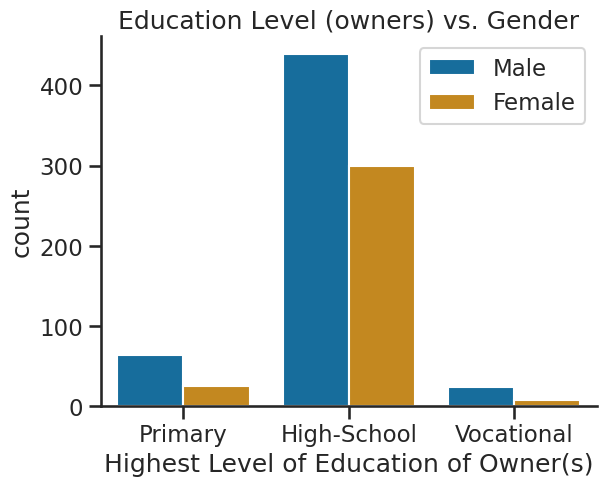

In [9]:
sns.countplot(
    data = data,
    x = "highest_education",
    hue = "gender"
)
plt.title("Education Level (owners) vs. Gender")
plt.xlabel("Highest Level of Education of Owner(s)")
plt.xticks(ticks =[0, 1, 2], labels=["Primary", "High-School", "Vocational"])
plt.legend(labels=["Male", "Female"])
sns.despine()
plt.show()

In [10]:
subsector_count = data["subsector"].value_counts().sort_index().reset_index()
subsector_count["label"] = subsector_count["subsector"].map({
    1 : "Metal and wood work",
    2 : "Construction",
    3 : "Agro-processing",
    4 : "Textile and garment",
    5 : "Leather and footwear",
    6 : "Retail",
    7 : "Urban agriculture",
    8 : "Others"
})
subsector_count

,subsector,count,label
0,1,122,Metal and wood work
1,2,64,Construction
2,3,183,Agro-processing
3,4,87,Textile and garment
4,5,34,Leather and footwear
5,6,273,Retail
6,7,42,Urban agriculture
7,8,55,Others


In [11]:
pie = px.pie(
    data_frame=subsector_count,
    names="label",
    values="count",
    title="Sub-Sectors of MSE",
    hole=0.4,
    template="plotly_white",
    color_discrete_sequence=px.colors.qualitative.Safe
)
pie.update_traces(textinfo='percent+label', hoverinfo='label+value+percent')
pie.update_layout(
    margin=dict(t=33, b=25, l=50, r=50)
)
pie

## 4. Analysis Results
### 4.1 Exploratory Data Analysis and Variables Association

**Exploration**
The very first thing we noticed when we started exploring the data was how "current_capital" was extremely skewed. This signaled to us from the start a possible transformation on our dependent variable was a good idea.


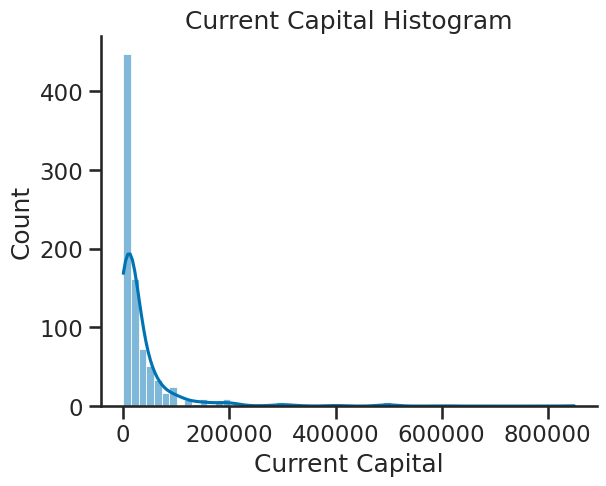

In [12]:
sns.histplot(
    data = data,
    x = "current_capital",
    kde = True
)
plt.title("Current Capital Histogram")
plt.xlabel("Current Capital")
sns.despine()
plt.show()

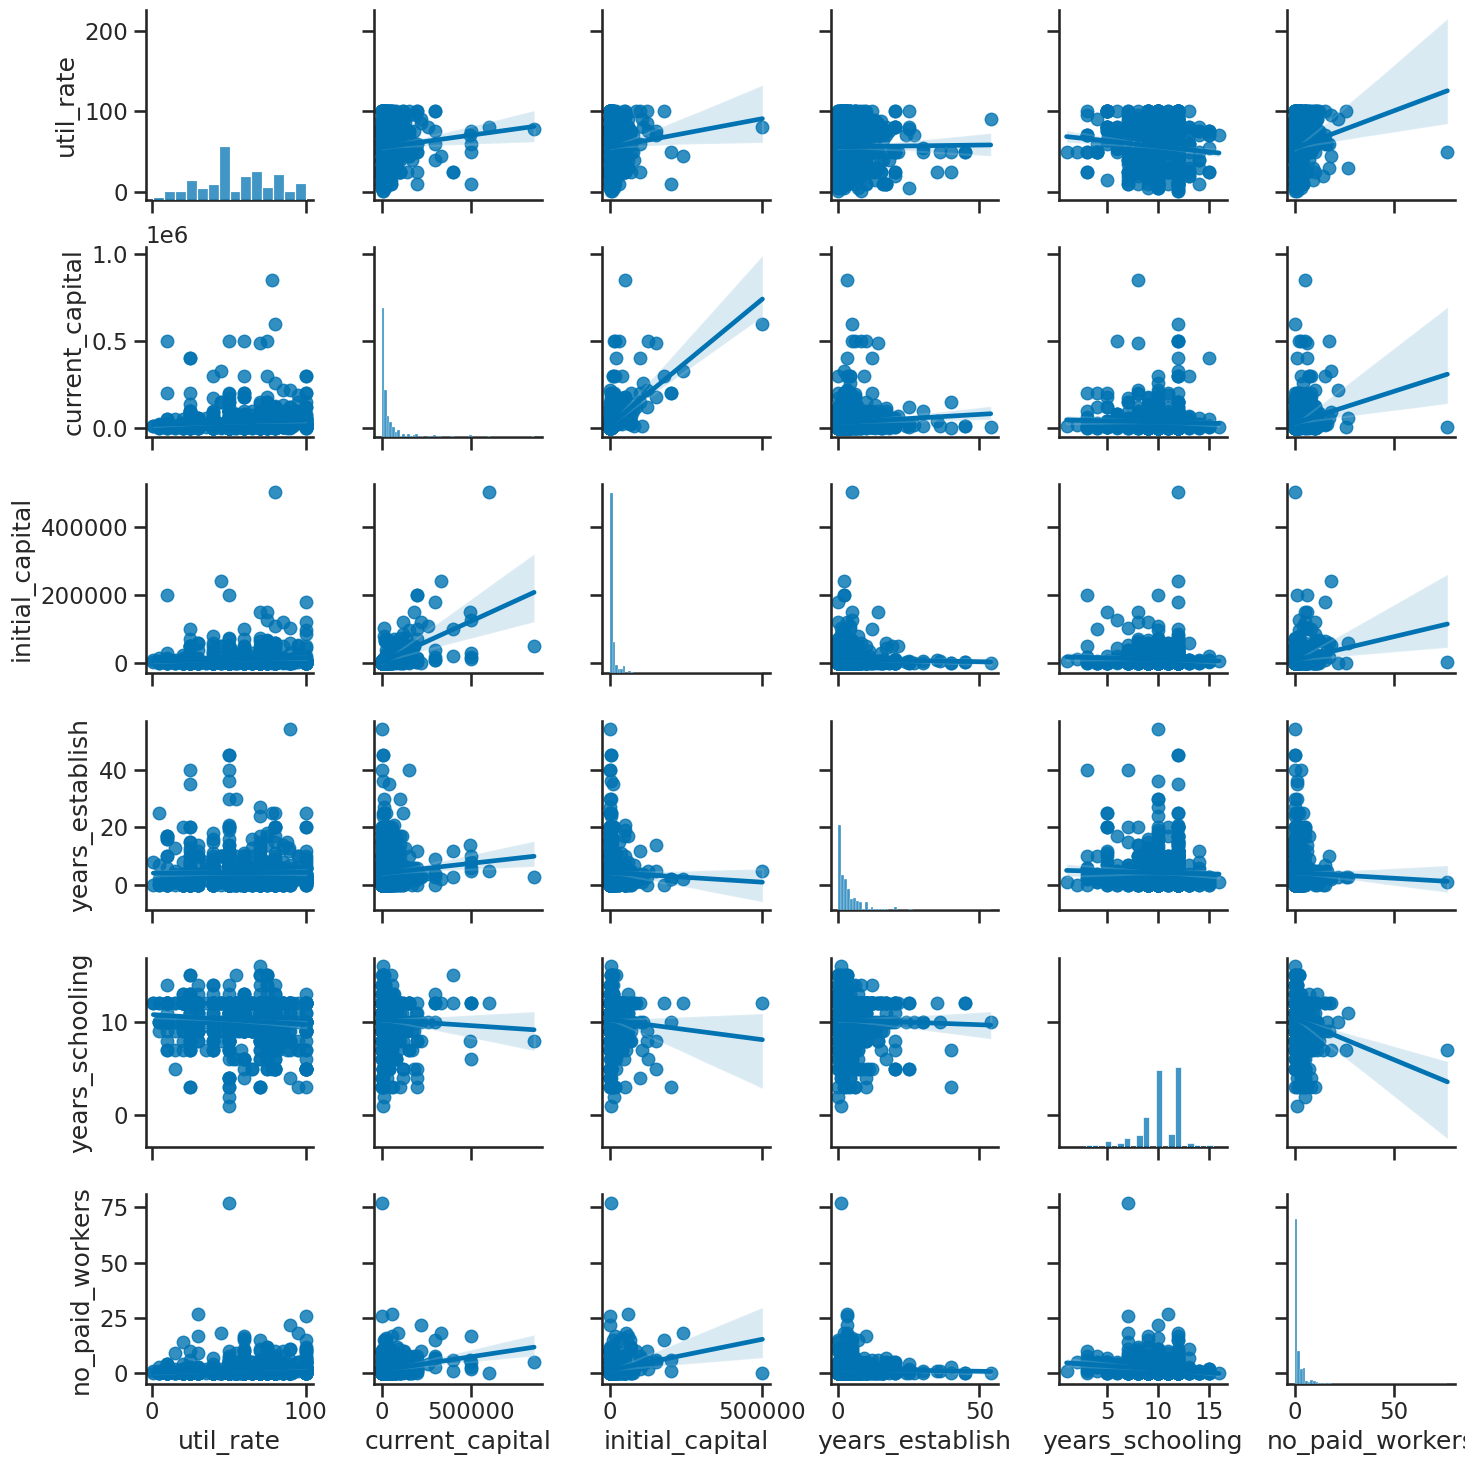

In [13]:
sns.pairplot(data = data, kind="reg")
sns.despine()
plt.show()

# current cpaital vs others

### recoding current capital

In [76]:
data["current_capital"].describe()

count       860.000000
mean      34234.709302
std       68692.331486
min         100.000000
25%        5000.000000
50%       12000.000000
75%       30000.000000
max      850000.000000
Name: current_capital, dtype: float64

In [77]:
mmin =  data.current_capital.min()
mmax = data.current_capital.max()
first_quartile = data.current_capital.quantile(0.25)
second_quartile = data.current_capital.quantile(0.5)
third_quartile = data.current_capital.quantile(0.75)
print(mmin, first_quartile, second_quartile, third_quartile, mmax)


100 5000.0 12000.0 30000.0 850000


In [78]:
# splitting current capital
data["current_capital_categorical"] = pd.cut(data["current_capital"], bins=[mmin-1, first_quartile, second_quartile, third_quartile, mmax+1], labels=["Low", "Low-medium", "High-medium", "High"])

In [79]:
cat_compare = data[["current_capital_categorical", "gender", "highest_education"]]
cat_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   current_capital_categorical  860 non-null    category
 1   gender                       860 non-null    category
 2   highest_education            860 non-null    category
dtypes: category(3)
memory usage: 3.1 KB


### current capital vs gender

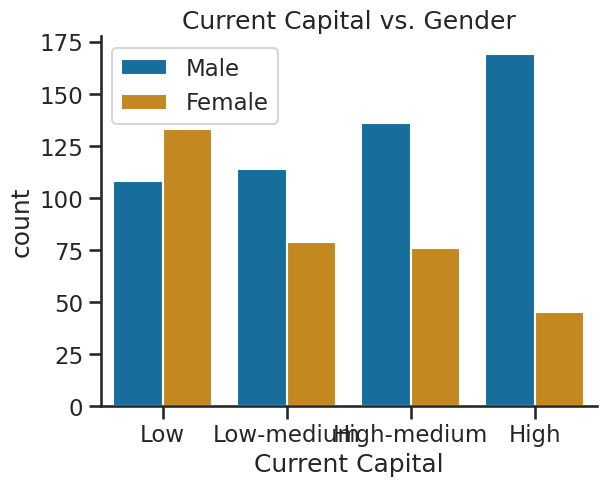

In [80]:
sns.countplot(
    data = cat_compare,
    x = "current_capital_categorical",
    hue = "gender"
)
plt.title("Current Capital vs. Gender")
plt.xlabel("Current Capital")
plt.legend(labels=["Male", "Female"])
sns.despine()
plt.show()

In [81]:
tab1 = pd.crosstab(cat_compare["current_capital_categorical"], data["gender"])

chi2, p, dof, expected1 = chi2_contingency(tab1)

print(f"Statistics: {chi2}\np-value: {p}\ndegree of freedom: {dof}\n\nobserved: \n{tab1}\n\nexpected: \n{expected1} ")

Statistics: 56.90504500890765
p-value: 2.6926638752357543e-12
degree of freedom: 3

observed: 
gender                         0    1
current_capital_categorical          
Low                          108  133
Low-medium                   114   79
High-medium                  136   76
High                         169   45

expected: 
[[147.68255814  93.31744186]
 [118.26860465  74.73139535]
 [129.91162791  82.08837209]
 [131.1372093   82.8627907 ]] 


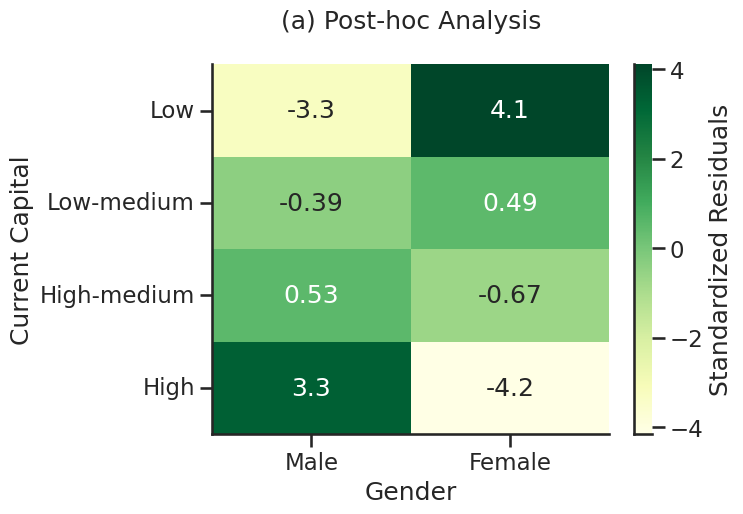

In [82]:
residuals = (tab1 - expected1)/ np.sqrt(expected1)
residuals.columns = ["Male", "Female"]

sns.heatmap(residuals, annot=True, center=0, cmap = "YlGn", cbar_kws={"label" : "Standardized Residuals"})
plt.title("(a) Post-hoc Analysis\n")
plt.xlabel("Gender")
plt.ylabel("Current Capital")
sns.despine()
plt.show()

### current capital vs highest level of education (owners)

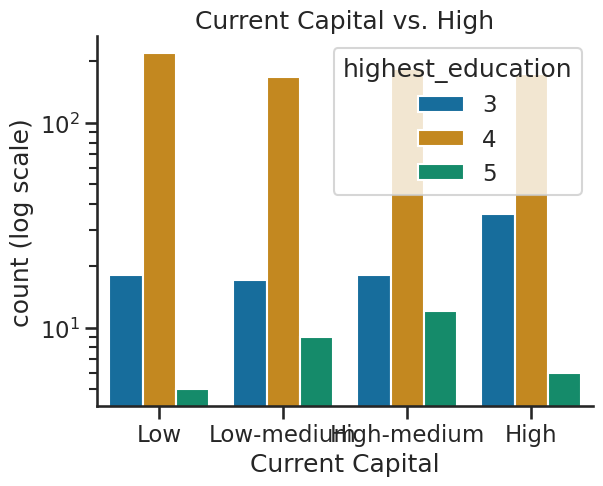

In [83]:
ax = sns.countplot(
    data = cat_compare,
    x = "current_capital_categorical",
    hue = "highest_education"
)
ax.set_yscale("log")
plt.title("Current Capital vs. High")
plt.ylabel("count (log scale)")
plt.xlabel("Current Capital")
sns.despine()
plt.show()

In [84]:
tab2 = pd.crosstab(cat_compare["current_capital_categorical"], cat_compare["highest_education"])
chi2, p, dof, expected2 = chi2_contingency(tab2)
print(f"Statistics: {chi2}\np-value: {p}\ndegree of freedom: {dof}\n\nobserved: \n{tab2}\n\nexpected: \n{expected2} ")

Statistics: 17.941791157357397
p-value: 0.006379320255157455
degree of freedom: 6

observed: 
highest_education             3    4   5
current_capital_categorical             
Low                          18  218   5
Low-medium                   17  167   9
High-medium                  18  182  12
High                         36  172   6

expected: 
[[ 24.94069767 207.09186047   8.96744186]
 [ 19.97325581 165.84534884   7.18139535]
 [ 21.93953488 182.17209302   7.88837209]
 [ 22.14651163 183.89069767   7.9627907 ]] 


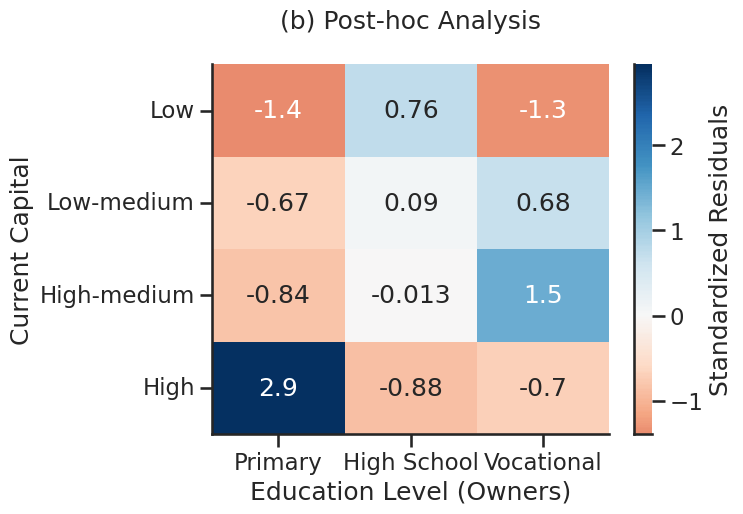

In [85]:
residuals = (tab2 - expected2)/ np.sqrt(expected2)
residuals.columns = ["Primary", "High School", "Vocational"]

sns.heatmap(residuals, annot=True, cmap="RdBu", center=0, cbar_kws = {"label" : "Standardized Residuals"})
plt.title("(b) Post-hoc Analysis\n")
plt.xlabel("Education Level (Owners)")
plt.ylabel("Current Capital")
sns.despine()
plt.show()

# Multiple Linear Regression

## Intital Full Model for checking assumptions (1st model)

### fitting full model

In [86]:
model = smf.ols(
    formula = "current_capital ~ initial_capital + years_establish + years_schooling + no_paid_workers + C(business_license) + C(loan) + C(land_premise) + C(gender)", 
    data = data,
).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        current_capital   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     66.58
Date:                Fri, 23 Jan 2026   Prob (F-statistic):           1.12e-84
Time:                        18:47:45   Log-Likelihood:                -10589.
No. Observations:                 860   AIC:                         2.120e+04
Df Residuals:                     851   BIC:                         2.124e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Linearity Assumption

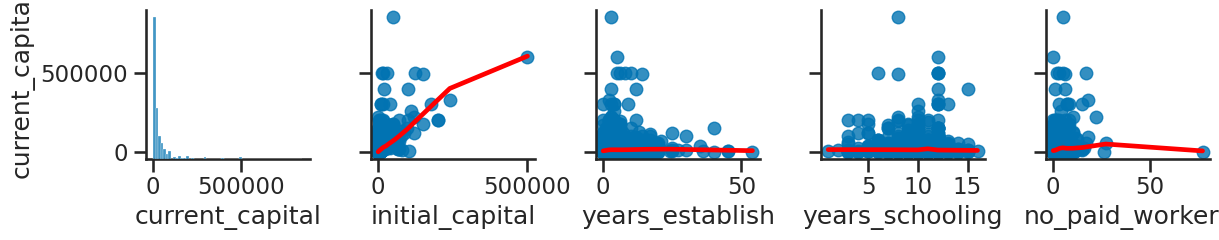

In [123]:
sns.pairplot(data = data, x_vars = ["current_capital", "initial_capital", "years_establish", "years_schooling", "no_paid_workers"],  y_vars = "current_capital", kind = "reg", plot_kws={'line_kws':{'color':'red'}, 'lowess': True})
sns.despine()
plt.show()

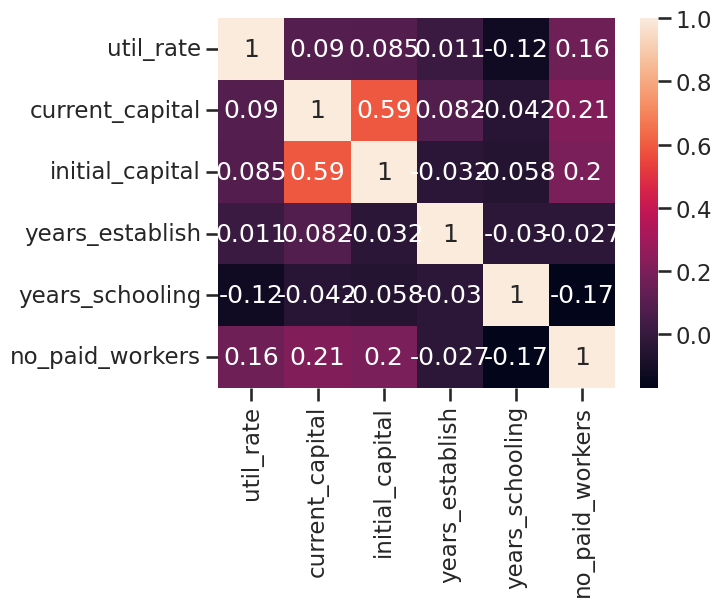

In [88]:
sns.heatmap(
    data.corr(numeric_only=True),
    annot=True
)
plt.show()

### Normality of errors assumption

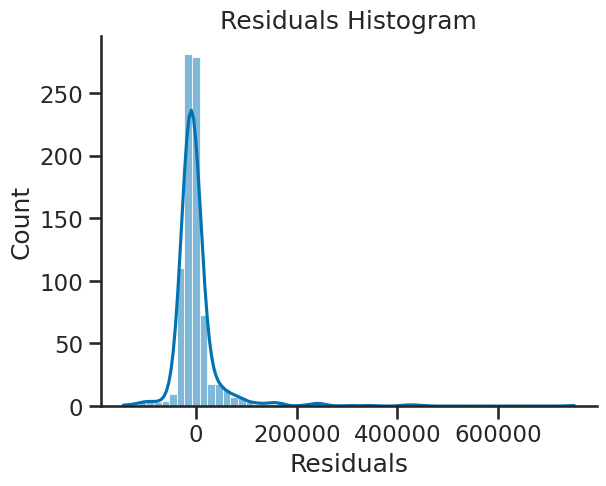

In [89]:
sns.histplot(model.resid, kde=True)
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
sns.despine()
plt.show()

In [90]:
print(f"Residual skewness: {model.resid.skew()}")
print(f"Residual kurtosis: {model.resid.kurtosis()}")

Residual skewness: 6.293173537761188
Residual kurtosis: 62.821888195859046


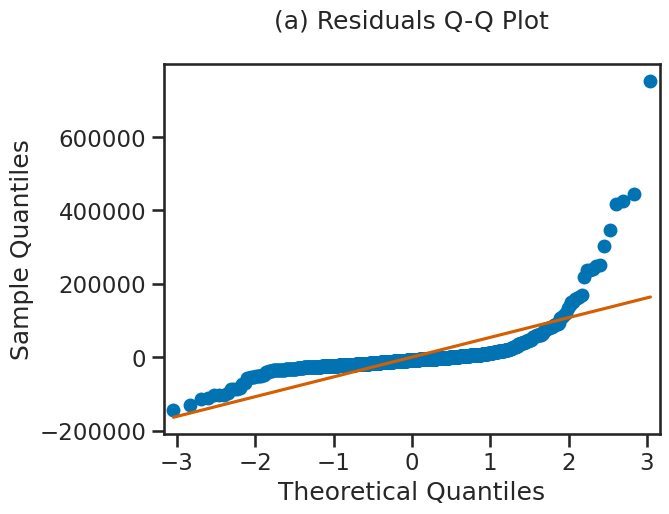

In [124]:
sm.qqplot(model.resid, line = "s")
plt.title("(a) Residuals Q-Q Plot\n")
plt.show()

In [92]:
shapiro_test = shapiro(model.resid)
print(f"Shapiro statistic: {shapiro_test.statistic}\np-value: {shapiro_test.pvalue}")

Shapiro statistic: 0.505506515007468
p-value: 1.3667390242525736e-43


### checking for constant variance (homoscedasticity)

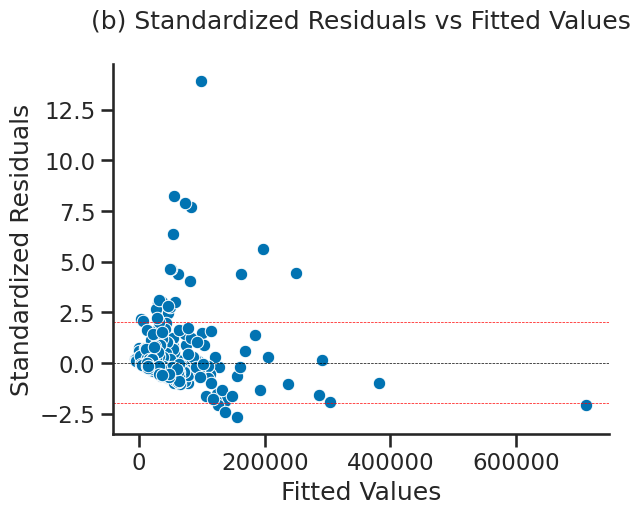

In [125]:
standard_resid = model.resid / np.sqrt(model.mse_resid)

sns.scatterplot(x = model.fittedvalues, y = standard_resid)
plt.title("(b) Standardized Residuals vs Fitted Values\n")
plt.ylabel("Standardized Residuals")
plt.xlabel("Fitted Values")
sns.despine()
plt.axhline(0, color = "black", linestyle = "--", linewidth = 0.5)
plt.axhline(2, color = "red", linestyle = "--", linewidth = 0.5)
plt.axhline(-2, color = "red", linestyle = "--", linewidth = 0.5)

plt.show()

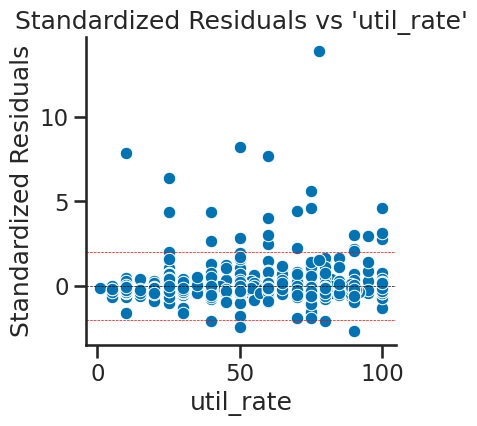

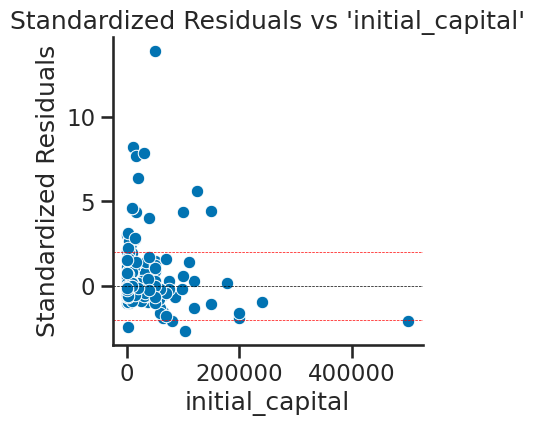

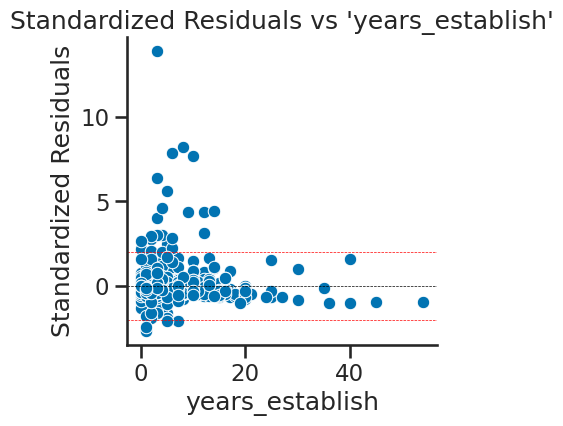

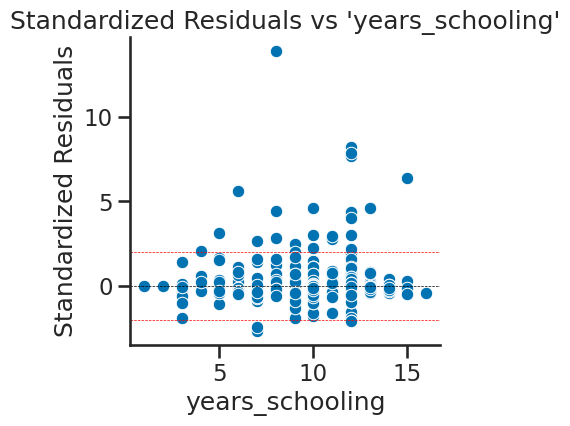

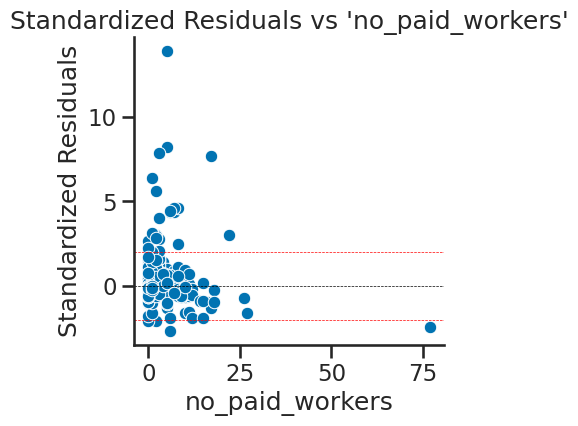

In [94]:
quant_cols = ["util_rate", "initial_capital", "years_establish", "years_schooling", "no_paid_workers"]
for col in quant_cols:
    plt.subplots(figsize = (4,4))
    sns.scatterplot(x = data[col], y = standard_resid)
    plt.title(f"Standardized Residuals vs '{col}'")
    plt.ylabel("Standardized Residuals")
    plt.xlabel(col)
    sns.despine()

    plt.axhline(0, color = "black", linestyle = "--", linewidth = 0.5)
    plt.axhline(2, color = "red", linestyle = "--", linewidth = 0.5)
    plt.axhline(-2, color = "red", linestyle = "--", linewidth = 0.5)
    plt.show()

Breusch-Pagan test is invalid since the erros are not normally distributed

We have explored it anyways

In [95]:
bp_data = data.drop(columns="current_capital").copy()
bp_data["Z"] = (model.resid ** 2) / model.mse_resid

bp = smf.ols(
    formula = "Z ~ initial_capital + years_establish + years_schooling + no_paid_workers + util_rate + C(business_registered) + C(TIN) + C(business_license) + C(MSE_type) + C(loan) + C(land_premise) + C(one_stop_service) + C(gender) + C(highest_education) + C(subsector)",
    data = bp_data
    ).fit()
anova_table = sm.stats.anova_lm(bp, typ=1)
print(anova_table)

                           df        sum_sq     mean_sq          F    PR(>F)
C(business_registered)    1.0     67.376280   67.376280   1.115277  0.291242
C(TIN)                    1.0    555.976295  555.976295   9.203053  0.002491
C(business_license)       1.0    381.908551  381.908551   6.321717  0.012113
C(MSE_type)               1.0    702.107477  702.107477  11.621957  0.000683
C(loan)                   1.0     61.153580   61.153580   1.012273  0.314650
C(land_premise)           1.0     11.919915   11.919915   0.197310  0.657016
C(one_stop_service)       1.0     17.884920   17.884920   0.296048  0.586515
C(gender)                 1.0    211.935795  211.935795   3.508165  0.061415
C(highest_education)      2.0    546.845867  273.422934   4.525959  0.011091
C(subsector)              7.0    435.612450   62.230350   1.030096  0.408236
initial_capital           1.0    286.494666  286.494666   4.742335  0.029708
years_establish           1.0     16.310079   16.310079   0.269980  0.603483

In [96]:
ssr_total = anova_table["sum_sq"].iloc[:-1].sum()
ssr_total / 2

np.float64(1854.1106941824173)

In [97]:
critical_value = stats.chi2.ppf(0.95, df=22)
print(f"Chi-square Critical Value: {critical_value:.4f}")

Chi-square Critical Value: 33.9244


"Koenker-Bassett" Modification (Studentized BP Test) that doesn't require the assumption of normality of residuals

In [98]:
bp_test = dg.het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange Multiplier statistic', 'p-value', 'f-value', 'f p-value']
results = dict(zip(labels, bp_test))
for key, value in results.items():
    print(f"{key}: {value:.4f}")

Lagrange Multiplier statistic: 27.6864
p-value: 0.0005
f-value: 3.5385
f p-value: 0.0005


### Chekcing for autocorrelation

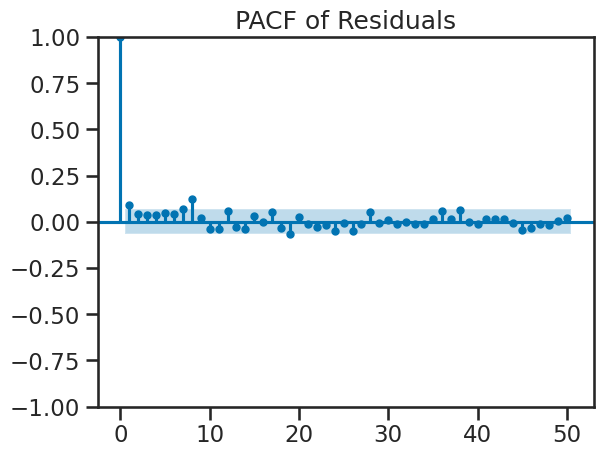

In [99]:
plot_pacf(model.resid, lags = 50, title = "PACF of Residuals")
plt.show()

Durbin watson test

In [100]:
dw = durbin_watson(model.resid) 

print(f"DW: {dw}")

DW: 1.820738953540482


Bruesch godfery test

In [101]:
bg_test = dg.acorr_breusch_godfrey(model, nlags=5)

results = dict(zip(["LM-Statistic", "LM-p-value", "F-Statstic", "F-p-value"], bg_test))
for key, value in results.items():
    print(f"{key}: {value:.4f}")

LM-Statistic: 13.3673
LM-p-value: 0.0202
F-Statstic: 2.6715
F-p-value: 0.0209


### checking for multicollinearity

we have already seen a correlation heatmap, we will start with VIF and follow with calculation the condition number

In [102]:
X = model.model.exog

vif_df = pd.DataFrame()
vif_df["predictors"] = model.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X, i) for i in range(vif_df.shape[0])]

vif_df.sort_values("VIF", ascending=False)

,predictors,VIF
0,Intercept,31.318362
8,no_paid_workers,1.137710
3,C(land_premise)[T.1],1.129244
4,C(gender)[T.1],1.061632
2,C(loan)[T.1],1.059312
7,years_schooling,1.051546
5,initial_capital,1.045782
6,years_establish,1.038753
1,C(business_license)[T.1],1.035689


In [103]:
eigenvals = np.linalg.eigvals(np.dot(X.T, X))
condition_index = np.sqrt(max(eigenvals) / min(eigenvals))
print(f"Codintion Index: {condition_index}")

Codintion Index: 171633.15699936857


- **Differences in Scale**: If one variable is in the thousands (like Area in sq meters) and another is a dummy (0 or 1), the eigenvalues of the matrix will be vastly different, causing the Condition Number to explode even if the variables aren't actually correlated.

- **The Intercept**: The Intercept often has a high VIF because the constant column (all 1s) can be partially "explained" by the other predictors if they don't have a mean of zero.

## Transforming the dependent and some independent variables (2nd model)

### Transformations and their effects

In [104]:
data["current_capital_log"] = np.log1p(data["current_capital"])
data["initial_capital_log"] = np.log1p(data["initial_capital"])
data["years_establish_log"] = np.log1p(data["years_establish"])
data["no_paid_workers_log"] = np.log1p(data["no_paid_workers"])
data["years_schooling_sq"] = data["years_schooling"] ** 2

## 4. Analysis Results
### 4.1 Exploratory Data Analysis and Variables Association

**Exploration**
The very first thing we noticed when we started exploring the data was how "current_capital" was extremely skewed. This signaled to us from the start a possible transformation on our dependent variable was a good idea.


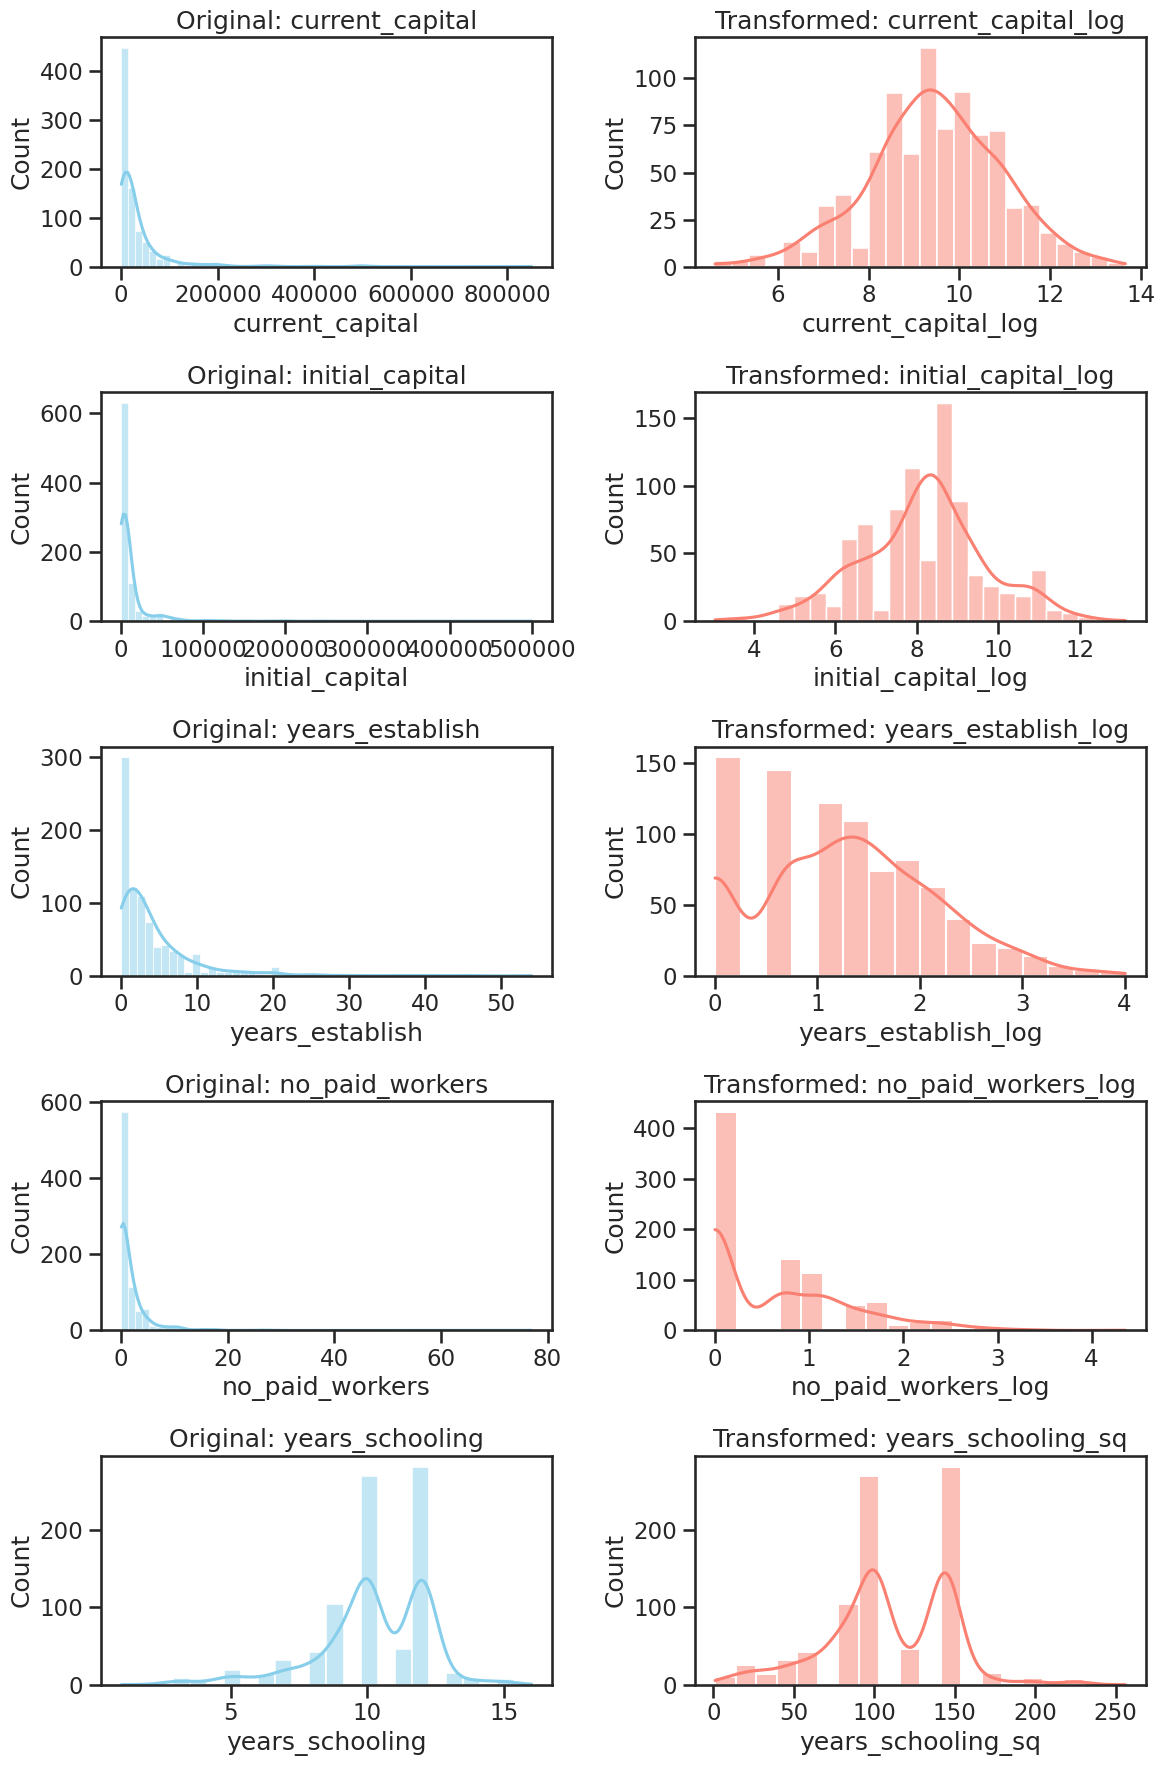

In [105]:
vars_to_plot = [
    ('current_capital', 'current_capital_log'),
    ('initial_capital', 'initial_capital_log'),
    ('years_establish', 'years_establish_log'),
    ('no_paid_workers', 'no_paid_workers_log'),
    ('years_schooling', 'years_schooling_sq')
]

fig, axes = plt.subplots(len(vars_to_plot), 2, figsize=(12, 18))

for i, (orig, trans) in enumerate(vars_to_plot):
    # Before transformation
    sns.histplot(data[orig], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Original: {orig}')
    
    # After transformation
    sns.histplot(data[trans], kde=True, ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'Transformed: {trans}')

plt.tight_layout()

### Fiting OLS and Checking assumptions

#### Fitting OLS

#### 4.2.2 Log Transformed Model (2nd model)

**Model formula:**
log(Current Capital_i) = beta_0 + beta_1 log(Initial Capital_i) + beta_2 log(Years Established_i) + beta_3 Years of Schooling_i + beta_4 log(Number of Paid Workers_i) + beta_5 Business License_i + beta_6 Loan_i + beta_7 Land Premise_i + beta_8 Gender_i + epsilon_i

Following results from our tests of assumption on the initial model and our observation of the skewness exhibited in many of the variables, we fitted a second model with appropriate transformations applied.


In [106]:
model_log = smf.ols(
    formula = "I(np.log1p(current_capital)) ~ I(np.log1p(initial_capital)) + I(np.log1p(years_establish)) + I(years_schooling ** 2) + I(np.log1p(no_paid_workers)) +  C(gender) + C(business_license) + C(loan) +C(land_premise)", 
    data = data,
).fit()


In [107]:
print(model_log.summary())

                                 OLS Regression Results                                 
Dep. Variable:     I(np.log1p(current_capital))   R-squared:                       0.596
Model:                                      OLS   Adj. R-squared:                  0.592
Method:                           Least Squares   F-statistic:                     157.0
Date:                          Fri, 23 Jan 2026   Prob (F-statistic):          8.28e-162
Time:                                  18:47:54   Log-Likelihood:                -1159.3
No. Observations:                           860   AIC:                             2337.
Df Residuals:                               851   BIC:                             2379.
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------

The r-square and adjusted r-square of the transformed model improved to 59.6% and 59.2%, respectively. Variance Inflation Factor (VIF) for all independent variables is below 1.23.
Despite improvements on the residuals vs fitted values, we still can see points outside the (+2, -2) line and Breusch-Pagan test gave a p-value of 0.0000. These results pushed us into fitting a weighted least square model with the same model formula.


#### Linearity

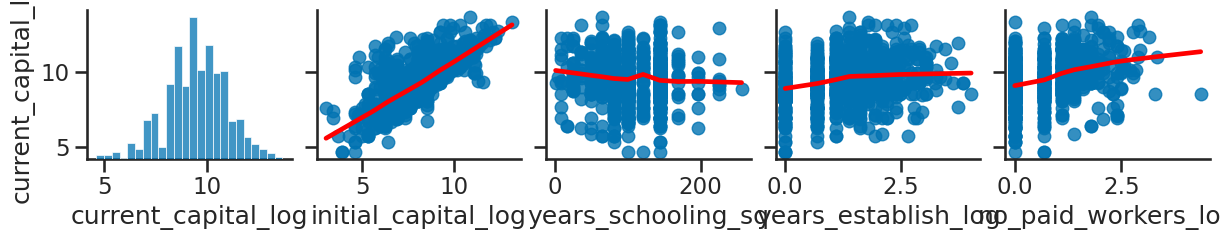

In [108]:
sns.pairplot(data = data, y_vars = "current_capital_log", x_vars = ["current_capital_log", "initial_capital_log", "years_schooling_sq", "years_establish_log", "no_paid_workers_log"], kind = "reg", plot_kws={'line_kws':{'color':'red'}, 'lowess': True})
sns.despine()
plt.show()

#### normaility of errors

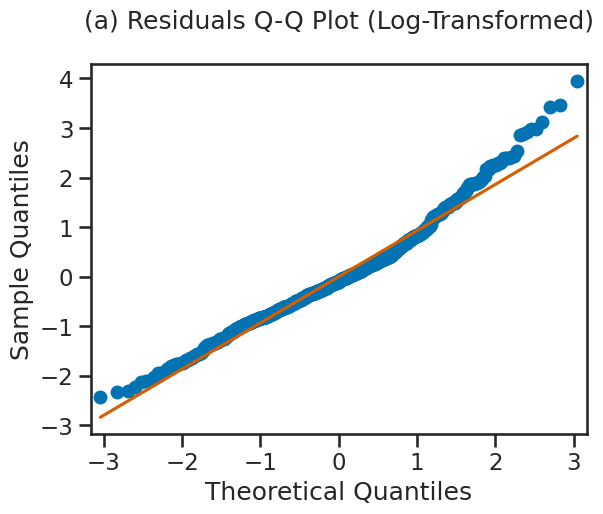

In [128]:
sm.qqplot(model_log.resid, line = "s")
plt.title("(a) Residuals Q-Q Plot (Log-Transformed)\n")
plt.show()

#### cosntant variance

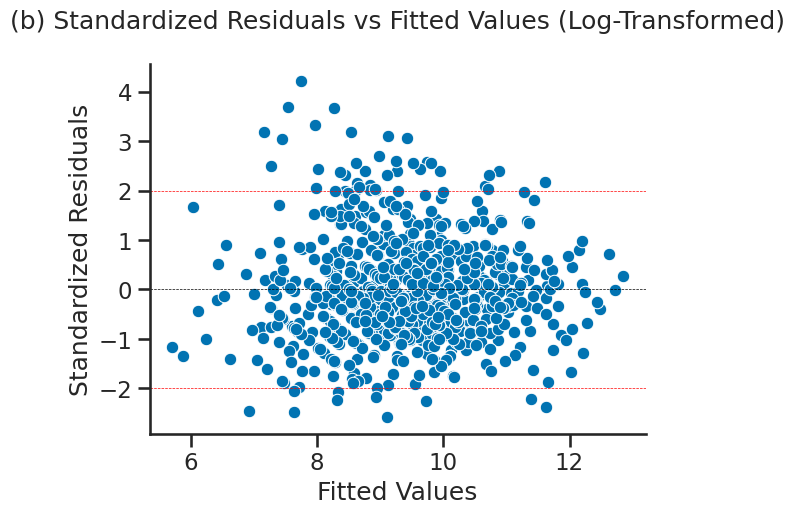

In [129]:
standard_resid = model_log.resid / np.sqrt(model_log.mse_resid)

sns.scatterplot(x = model_log.fittedvalues, y = standard_resid)
plt.title("(b) Standardized Residuals vs Fitted Values (Log-Transformed)\n")
plt.ylabel("Standardized Residuals")
plt.xlabel("Fitted Values")
sns.despine()
plt.axhline(0, color = "black", linestyle = "--", linewidth = 0.5)
plt.axhline(2, color = "red", linestyle = "--", linewidth = 0.5)
plt.axhline(-2, color = "red", linestyle = "--", linewidth = 0.5)

plt.show()

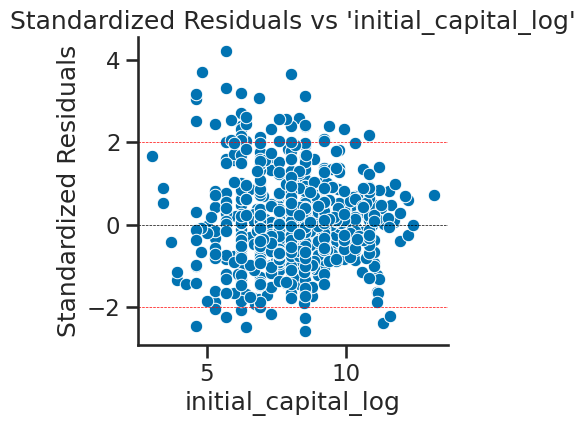

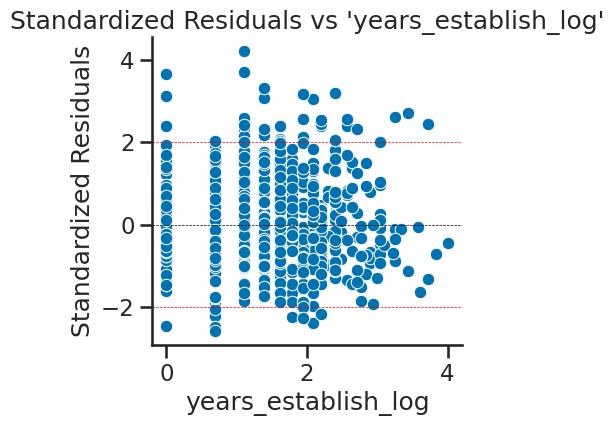

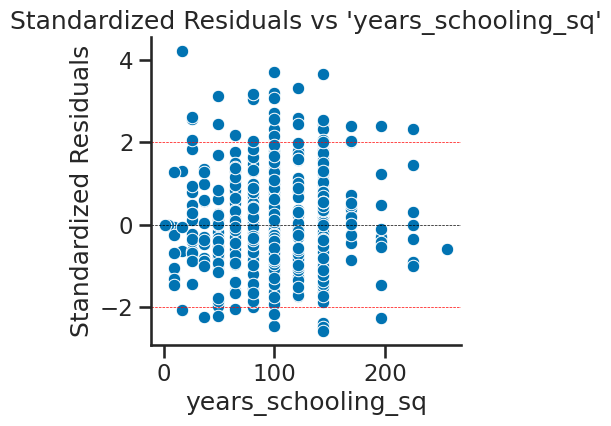

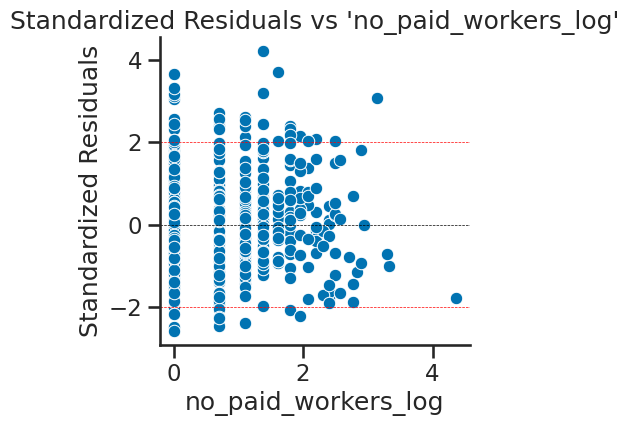

In [110]:
quant_cols = [ "initial_capital_log", "years_establish_log", "years_schooling_sq", "no_paid_workers_log"]
for col in quant_cols:
    plt.subplots(figsize = (4,4))
    sns.scatterplot(x = data[col], y = standard_resid)
    plt.title(f"Standardized Residuals vs '{col}'")
    plt.ylabel("Standardized Residuals")
    plt.xlabel(col)
    sns.despine()

    plt.axhline(0, color = "black", linestyle = "--", linewidth = 0.5)
    plt.axhline(2, color = "red", linestyle = "--", linewidth = 0.5)
    plt.axhline(-2, color = "red", linestyle = "--", linewidth = 0.5)
    plt.show()

In [130]:
bp_test = dg.het_breuschpagan(model_log.resid, model_log.model.exog)
labels = ['Lagrange Multiplier statistic', 'p-value', 'f-value', 'f p-value']
results = dict(zip(labels, bp_test))
for key, value in results.items():
    print(f"{key}: {value:.4f}")

Lagrange Multiplier statistic: 99.1717
p-value: 0.0000
f-value: 13.8657
f p-value: 0.0000


#### autocorrelation check

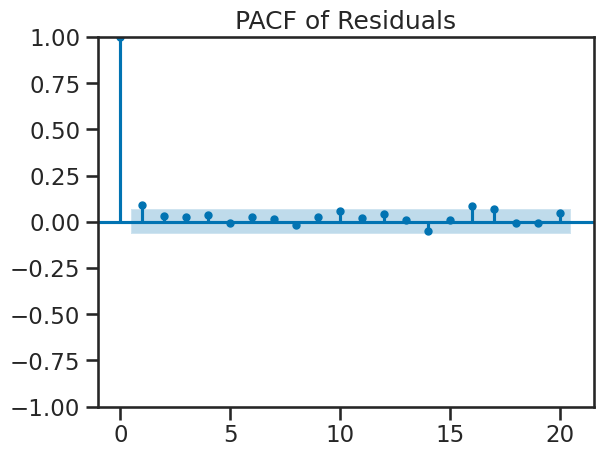

In [111]:
plot_pacf(model_log.resid, lags = 20, title = "PACF of Residuals")
plt.show()

In [112]:
dw_statistic = durbin_watson(model_log.wresid)

print(f"Durbin-Watson statistic: {dw_statistic}")

Durbin-Watson statistic: 1.8201315184193003


#### multicollinearity

In [113]:
X = model_log.model.exog

vif_df = pd.DataFrame()
vif_df["predictors"] = model_log.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X, i) for i in range(vif_df.shape[0])]

vif_df.sort_values("VIF", ascending=False)

,predictors,VIF
0,Intercept,42.420175
8,I(np.log1p(no_paid_workers)),1.229635
4,C(land_premise)[T.1],1.133104
5,I(np.log1p(initial_capital)),1.126048
1,C(gender)[T.1],1.103330
2,C(business_license)[T.1],1.097113
6,I(np.log1p(years_establish)),1.082617
3,C(loan)[T.1],1.064967
7,I(years_schooling ** 2),1.061111


## Weighted Least Squares for hetroscedasticity (3rd model)

#### WLS weights and fitting

In [114]:
ols_model = smf.ols(
    formula = "I(np.log1p(current_capital)) ~ I(np.log1p(initial_capital)) + I(np.log1p(years_establish)) + I(years_schooling ** 2) + I(np.log1p(no_paid_workers)) +  C(gender) + C(business_license) + C(loan) +C(land_premise) + C(subsector) + C(subsector)", 
    data = data,
).fit()

sq_resid = (ols_model.resid) ** 2
variance_data = data.copy()
variance_data["sq_resid"] = sq_resid

predictor_vars = "I(np.log1p(initial_capital)) + I(np.log1p(years_establish)) + I(years_schooling ** 2) + I(np.log1p(no_paid_workers)) +  C(gender) + C(business_license) + C(loan) +C(land_premise) + C(subsector) + C(subsector)"

sq_resid_model = smf.ols(
    formula = f"sq_resid ~ {predictor_vars}",
    data = variance_data
).fit()

weights = 1 / (np.maximum(sq_resid_model.fittedvalues, 1e-6))

In [133]:
model_wls = smf.wls(
    formula = "I(np.log1p(current_capital)) ~ I(np.log1p(initial_capital)) + I(np.log1p(years_establish)) + I(years_schooling ** 2) + I(np.log1p(no_paid_workers)) +  C(gender) + C(business_license) + C(loan) +C(land_premise)",
    data = data,
    weights = weights
).fit()

In [134]:
print(model_wls.summary())

                                 WLS Regression Results                                 
Dep. Variable:     I(np.log1p(current_capital))   R-squared:                       0.816
Model:                                      WLS   Adj. R-squared:                  0.814
Method:                           Least Squares   F-statistic:                     472.2
Date:                          Fri, 23 Jan 2026   Prob (F-statistic):          7.69e-307
Time:                                  20:02:24   Log-Likelihood:                -4590.2
No. Observations:                           860   AIC:                             9198.
Df Residuals:                               851   BIC:                             9241.
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------

R-square and adjusted r-square jumped to 81.6% and 81.4%, respectively. Durbin-Watson statistic was found to be 1.966, with all VIF values for the independent variables below 1.23.

## 6. Conclusion
Initial capital is the strongest predictor of current capital, while female owners tend to have lower current capital than male ones. We would like to explore why this is so in future studies.
Years since establishment and the receiving of land/premises were not found to be statistically significant.
Owners with a primary level of education as their highest level of education appear to have higher current capital than expected. When it comes to years of schooling, it is actually positively related with current capital.
Most MSEs are in the retail and agro-processing sub-sectors.

## References
Gebreeyesus, M. (2011). Industrial policy and development in Ethiopia: Evolution and present state. Africa Growth Initiative Working Paper, 6. Washington, DC: Brookings Institution.
Kutner, M. H., Nachtshein, C. J., Neter, J., & Li, W. (2005). Applied linear statistical models (5th ed.). McGraw-Hill.
Zelalem, T. (2023). Lecture note: Econometrics (Stat4061). Addis Ababa University.


### Checking assumptions

#### Homoscedasticity

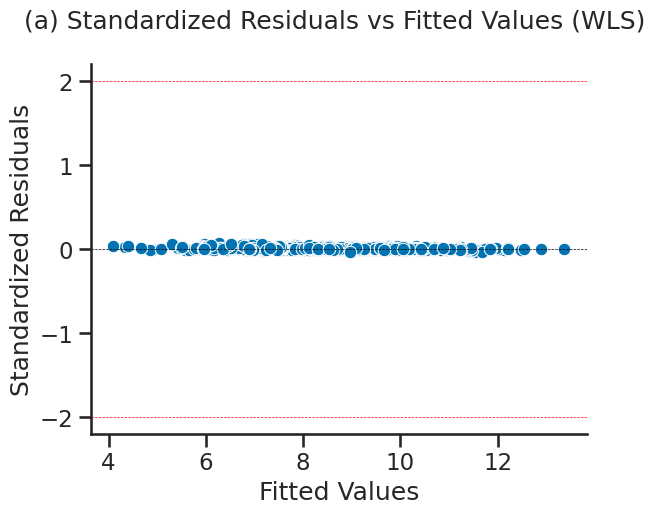

In [135]:
standard_resid = model_wls.resid / np.sqrt(model_wls.mse_resid)

sns.scatterplot(x = model_wls.fittedvalues, y = standard_resid)
plt.title("(a) Standardized Residuals vs Fitted Values (WLS) \n")
plt.ylabel("Standardized Residuals")
plt.xlabel("Fitted Values")
sns.despine()
plt.axhline(0, color = "black", linestyle = "--", linewidth = 0.5)
plt.axhline(2, color = "red", linestyle = "--", linewidth = 0.5)
plt.axhline(-2, color = "red", linestyle = "--", linewidth = 0.5)

plt.show()

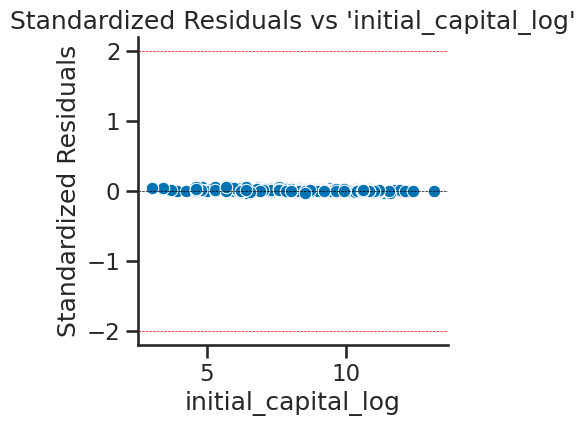

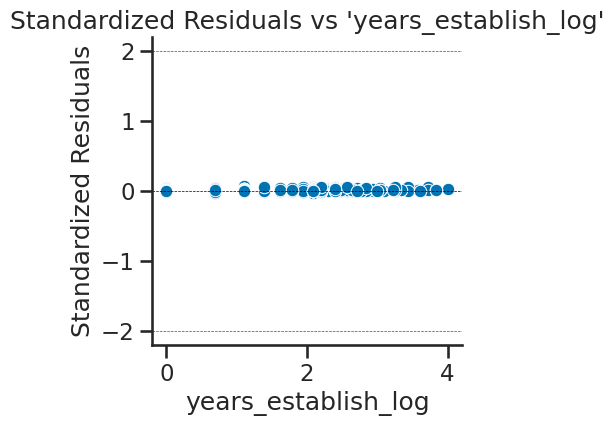

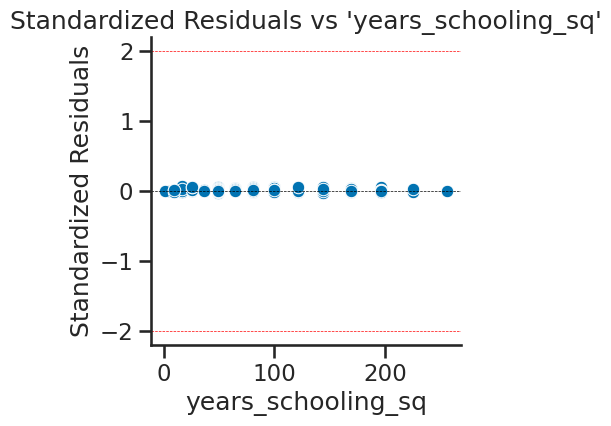

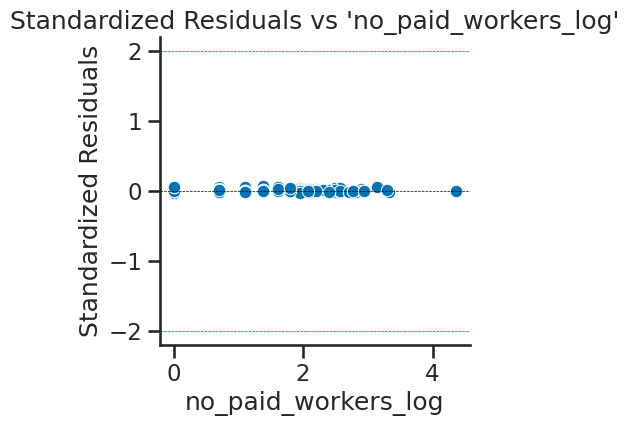

In [118]:
quant_cols = [ "initial_capital_log", "years_establish_log", "years_schooling_sq", "no_paid_workers_log"]
for col in quant_cols:
    plt.subplots(figsize = (4,4))
    sns.scatterplot(x = data[col], y = standard_resid)
    plt.title(f"Standardized Residuals vs '{col}'")
    plt.ylabel("Standardized Residuals")
    plt.xlabel(col)
    sns.despine()

    plt.axhline(0, color = "black", linestyle = "--", linewidth = 0.5)
    plt.axhline(2, color = "red", linestyle = "--", linewidth = 0.5)
    plt.axhline(-2, color = "red", linestyle = "--", linewidth = 0.5)
    plt.show()

#### autocorrelation check

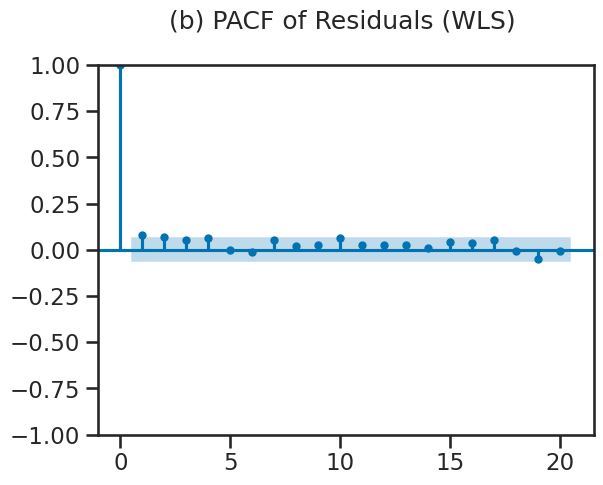

In [137]:
plot_pacf(model_wls.resid, lags = 20, title = "(b) PACF of Residuals (WLS) \n")
plt.show()

In [120]:
dw_statistic = durbin_watson(model_wls.wresid)

print(f"Durbin-Watson statistic: {dw_statistic}")

Durbin-Watson statistic: 1.9663360022304515


#### multicollinearity

In [121]:
X = model_wls.model.exog

vif_df = pd.DataFrame()
vif_df["predictors"] = model_wls.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X, i) for i in range(vif_df.shape[0])]

vif_df.sort_values("VIF", ascending=False)

,predictors,VIF
0,Intercept,42.420175
8,I(np.log1p(no_paid_workers)),1.229635
4,C(land_premise)[T.1],1.133104
5,I(np.log1p(initial_capital)),1.126048
1,C(gender)[T.1],1.103330
2,C(business_license)[T.1],1.097113
6,I(np.log1p(years_establish)),1.082617
3,C(loan)[T.1],1.064967
7,I(years_schooling ** 2),1.061111
